Plots of Chukchi Nitrates with other parameters
- for Mordy, EWise

Details
- uses filtered NO3
- salinity, temperature, ice concentration (D.Strausz)
- determines water mass from T/S per:   
`Definitions of water types are from Danielson SL, A comparison between late  
summer 2012 and 2013 water masses, macronutrients, and phytoplankton standing  
crops in the northern Bering and Chukchi Seas, 2017.`


***E. Wisegarvers orig. code***

Throws an error in date conversion... didn't persue this, just made other edits to dataframe usage

In [1]:
### code in this block is unmodified from E.Wise with the exception of pointing to data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import matplotlib.patches as patches
from datetime import datetime, date#, timedelta
import glob
#from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

##############################################################################
##############################################################################
def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
                sp.set_visible(False)
                
##############################################################################
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
##############################################################################
##############################################################################
   

data_dir = '/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/'

fig = plt.figure(figsize=(6,11),dpi=100)
    
missing_value = 1E35

col_names=['mooring','date','latitude','longitude','temp','salinity','par','fluor','oxy','osat','icecov','no3','calno3','no3_f35']

for file in glob.glob(data_dir + '*.csv'):  #change file path you want to work from before running
    print(f"{file}")
    csv_file = open(file,'r')
    csv_data = pd.read_csv(csv_file,header=None,skiprows=1,names=col_names,na_values='1E+35')

    data = pd.DataFrame(data=csv_data, columns=col_names)

#Values that set the size and location of the water type bar at the top of the plot
    wtmark = 10
    wtval = 35 + (0.0124 * wtmark + 0.028)
    #wtval = 35.08
    
    
#Definitions of water types are from Danielson SL, A comparison between late  
#summer 2012 and 2013 water masses, macronutrients, and phytoplankton standing  
#crops in the northern Bering and Chukchi Seas, 2017.

    #Arctic Coastal Water
    data['acw'] = np.where(((data['salinity'] >= 20) & (data['salinity'] < 32) & (data['temp'] >= 7) & (data['temp'] < 12)), wtval, np.nan)
    #Bering Chukchi Winter Water
    data['ww'] = np.where(((data['salinity'] >= 30) & (data['salinity'] < 33.5) & (data['temp'] >= -2) & (data['temp'] < 0)), wtval,np.nan)
    #Bering Chukchi Summer Water
    data['bsw'] = np.where(((data['salinity'] >= 30) & (data['salinity'] < 33.5) & (data['temp'] >= 0) & (data['temp'] < 7)), wtval, np.nan)
    #Melt Water
    data['mw'] = np.where(((data['salinity'] >= 25) & (data['salinity'] < 30) & (data['temp'] >= -2) & (data['temp'] < 7)), wtval, np.nan)
    #Atlantic Water
    data['aw'] = np.where(((data['salinity'] >= 33.5) & (data['salinity'] < 35) & (data['temp'] >= -2) & (data['temp'] < 1)), wtval, np.nan)

    mooring = data.mooring.tolist()
    date_time = data.date.tolist()
    latitude = data.latitude.tolist()
    longitude = data.longitude.tolist()
    temp = data.temp.tolist()
    salt = data.salinity.tolist()
    par = data.par.tolist()
    fluor = data.fluor.tolist()
    oxy = data.oxy.tolist()
    ost = data.osat.tolist()
    nitrate = data.no3.tolist()
    cal = data.calno3.tolist()
    fno3 = data.no3_f35.tolist()
    icecov = data.icecov.tolist()
    acw = data.acw.tolist()
    mw = data.mw.tolist()
    bsw = data.bsw.tolist()
    aw = data.aw.tolist()
    ww = data.ww.tolist()

    mName = mooring[1]
    new_date = [datetime.strptime(d,'%m/%d/%Y %H:%M') for d in date_time]
    iyear = new_date[1]
    
    x_value = np.asarray(new_date)
    x_sort = np.sort(x_value.flatten())

    days = mdates.DayLocator()
    months = mdates.MonthLocator()
    dateFmt = mdates.DateFormatter('%b')
    
    fig, ax1 = plt.subplots(figsize=(8,1.5))
    #ax1 = plt.subplots()
    #ax1.figsize=(80,120)
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    ax3.spines['right'].set_position(('axes',1.12))
    make_patch_spines_invisible(ax3)
    ax3.spines['right'].set_visible(True)

    
    a1, =ax1.plot(x_sort,nitrate,color=lighten_color('b',.8),linestyle='-',linewidth=.5)
    a2, =ax1.plot(x_sort,fluor,color=lighten_color('g',.3),linestyle='-',linewidth=.5)
    a3, =ax2.plot(x_sort,salt,color=lighten_color('r',.8),linestyle='-',linewidth=.5)
    a4, =ax3.plot(x_sort[~np.isnan(data.icecov)],data.icecov[~np.isnan(data.icecov)],color=lighten_color('k',.8),linestyle='-',linewidth=.5)
       
    wm_color = 'b'
    wtkw = dict(markersize = wtmark, markeredgewidth=.5,marker='|',clip_on=False)
    wt, =ax2.plot(x_sort,ww,color=lighten_color(wm_color,0.1),**wtkw)
    wt, =ax2.plot(x_sort,bsw,color=lighten_color(wm_color,0.3),**wtkw)
    wt, =ax2.plot(x_sort,acw,color=lighten_color(wm_color,0.5),**wtkw)
    wt, =ax2.plot(x_sort,mw,color=lighten_color(wm_color,0.7),**wtkw)
    wt, =ax2.plot(x_sort,aw,color=lighten_color(wm_color,1),**wtkw)
    dn, =ax1.plot(x_sort,cal,'k.',markersize=10)
    
    #Set axis ranges and tick intervals
    ax1.set_xlim([date(iyear.year,8,1),date((iyear.year+1),10,1)])
    ax1.xaxis.set_major_formatter(dateFmt)
    ax1.xaxis.set_major_locator(months)
    
    ax1.yaxis.set_ticks(np.arange(0,30,5))
    ax2.yaxis.set_ticks(np.arange(31,36,1))
    ax3.yaxis.set_ticks(np.arange(0,200,25))
    
    ax1.set_ylim(0,25)
    ax2.set_ylim(31,35)
    ax3.set_ylim(0,105)
    
    lfmt = dict(fontsize=8)
    ax1.set_xlabel('Date',**lfmt)
    ax1.set_ylabel('Nitrate (uM)',**lfmt)
    ax2.set_ylabel('Salinity',**lfmt)
    ax3.set_ylabel('Ice Coverage (%)',**lfmt)
    
    #ybox1 = TextArea("Data2-y ", textprops=dict(color="r", size=15,rotation=90,ha='left',va='bottom'))
    #ybox2 = TextArea("and ",     textprops=dict(color="k", size=15,rotation=90,ha='left',va='bottom'))
    #ybox3 = TextArea("Data1-y ", textprops=dict(color="b", size=15,rotation=90,ha='left',va='bottom'))
    
    ax1.yaxis.label.set_color(a1.get_color())
    ax2.yaxis.label.set_color(a3.get_color())
    ax3.yaxis.label.set_color(a4.get_color())
    
    tkw = dict(size=4, width=2, labelsize=8,colors='k')
    ax1.tick_params(axis='x', **tkw)
    ax1.tick_params(axis='x', which='minor',length=4)
    ax1.tick_params(axis='y', **tkw)
    ax2.tick_params(axis='y', **tkw)
    ax3.tick_params(axis='y', **tkw)

    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False)
    #ax3.axes.get_yaxis().set_visible(False)
    
    #plt.title(data.mooring[0])
    
    plt.plot() 
    csv_file.close()
    
    plt.subplots_adjust(hspace=0.4)
    plt.savefig('plots/' + mName + '_timeseries.png',bbox_inches='tight',dpi=300,format='png')
    plt.savefig('plots/' + mName + '_timeseries.eps',format='eps',dpi=1000,bbox_inches='tight')
    plt.show()  

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/17ckp3a_merge_190715_f35_f35.csv


TypeError: strptime() argument 1 must be str, not float

<Figure size 600x1100 with 0 Axes>

***Modify E. Wisegarvers orig. code*** plots same plots as his original routines

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/17ckp3a_merge_190715_f35_f35.csv


<Figure size 600x1100 with 0 Axes>

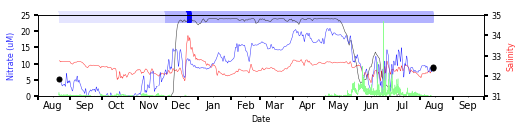

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/16ckp2a_merge_190906_f35.csv


AttributeError: 'DataFrame' object has no attribute 'salinity_f35'

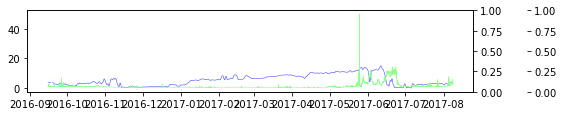

In [4]:
### modified original code above and cleaned

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import matplotlib.patches as patches
from datetime import datetime, date#, timedelta
import glob
#from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

##############################################################################
##############################################################################
def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
                sp.set_visible(False)
                
##############################################################################
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
##############################################################################
##############################################################################
   
data_dir = '/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/'

fig = plt.figure(figsize=(6,11),dpi=100)

for file in glob.glob(data_dir + '*.csv'):  #change file path you want to work from before running
    print(f"{file}")
    csv_file = open(file,'r')
    data = pd.read_csv(csv_file,na_values='1E+35',parse_dates=True,index_col='date')

    #columns aren't all the same name... eric just defined them on position but I would like to rename them
    try:
        data['salinity'] = data['sal']
        data['salinity_f35'] = data['sal_f35']
    except:
        pass
    
    #Values that set the size and location of the water type bar at the top of the plot
    wtmark = 10
    wtval = 35 + (0.0124 * wtmark + 0.028)
    #wtval = 35.08
    
    
    #Definitions of water types are from Danielson SL, A comparison between late  
    #summer 2012 and 2013 water masses, macronutrients, and phytoplankton standing  
    #crops in the northern Bering and Chukchi Seas, 2017.

    #Arctic Coastal Water
    data['acw'] = np.where(((data['salinity'] >= 20) & (data['salinity'] < 32) & (data['temp'] >= 7) & (data['temp'] < 12)), wtval, np.nan)
    #Bering Chukchi Winter Water
    data['ww'] = np.where(((data['salinity'] >= 30) & (data['salinity'] < 33.5) & (data['temp'] >= -2) & (data['temp'] < 0)), wtval,np.nan)
    #Bering Chukchi Summer Water
    data['bsw'] = np.where(((data['salinity'] >= 30) & (data['salinity'] < 33.5) & (data['temp'] >= 0) & (data['temp'] < 7)), wtval, np.nan)
    #Melt Water
    data['mw'] = np.where(((data['salinity'] >= 25) & (data['salinity'] < 30) & (data['temp'] >= -2) & (data['temp'] < 7)), wtval, np.nan)
    #Atlantic Water
    data['aw'] = np.where(((data['salinity'] >= 33.5) & (data['salinity'] < 35) & (data['temp'] >= -2) & (data['temp'] < 1)), wtval, np.nan)

    mName = file.split('/')[-1].split('_')[0]

    iyear = data.index.year[0]

    fig, ax1 = plt.subplots(figsize=(8,1.5))
    #ax1 = plt.subplots()
    #ax1.figsize=(80,120)
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    ax3.spines['right'].set_position(('axes',1.12))
    make_patch_spines_invisible(ax3)
    ax3.spines['right'].set_visible(False)

    
    a1, =ax1.plot(data.index,data.no3_f35,color=lighten_color('b',.8),linestyle='-',linewidth=.5)
    a2, =ax1.plot(data.index,data.fluor,color=lighten_color('g',.3),linestyle='-',linewidth=.5)
    a3, =ax2.plot(data.index,data.salinity_f35,color=lighten_color('r',.8),linestyle='-',linewidth=.5)
    try:
        a4, =ax3.plot(data.index[~np.isnan(data.icecov)],data.icecov[~np.isnan(data.icecov)],color=lighten_color('k',.8),linestyle='-',linewidth=.5)
    except:
        a4, =ax3.plot(data.index[~np.isnan(data.ice)],data.ice[~np.isnan(data.ice)],color=lighten_color('k',.8),linestyle='-',linewidth=.5)
        
    wm_color = 'b'
    wtkw = dict(markersize = wtmark, markeredgewidth=.5,marker=3,clip_on=False)
    wt, =ax2.plot(data.index,data.bsw,color=lighten_color(wm_color,0.1),**wtkw)
    wt, =ax2.plot(data.index,data.ww,color=lighten_color(wm_color,0.3),**wtkw)
    wt, =ax2.plot(data.index,data.acw,color=lighten_color(wm_color,0.5),**wtkw)
    wt, =ax2.plot(data.index,data.mw,color=lighten_color(wm_color,0.7),**wtkw)
    wt, =ax2.plot(data.index,data.aw,color=lighten_color(wm_color,1),**wtkw)
    dn, =ax1.plot(data.index,data.calno3,'k.',markersize=10)
    
    #Set axis ranges and tick intervals
    ax1.set_xlim([date(iyear,8,1),date((iyear+1),10,1)])
    ax1.xaxis.set_major_formatter(mdates.DateFormatter(''))
    ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_minor_locator(mdates.DayLocator(15))
    
    ax1.yaxis.set_ticks(np.arange(0,30,5))
    ax2.yaxis.set_ticks(np.arange(31,36,1))
    ax3.yaxis.set_ticks(np.arange(0,200,25))
    
    ax1.set_ylim(0,25)
    ax2.set_ylim(31,35)
    ax3.set_ylim(0,105)
    
    lfmt = dict(fontsize=8)
    ax1.set_xlabel('Date',**lfmt)
    ax1.set_ylabel('Nitrate (uM)',**lfmt)
    ax2.set_ylabel('Salinity',**lfmt)
    ax3.set_ylabel('Ice Coverage (%)',**lfmt)
    
    #ybox1 = TextArea("Data2-y ", textprops=dict(color="r", size=15,rotation=90,ha='left',va='bottom'))
    #ybox2 = TextArea("and ",     textprops=dict(color="k", size=15,rotation=90,ha='left',va='bottom'))
    #ybox3 = TextArea("Data1-y ", textprops=dict(color="b", size=15,rotation=90,ha='left',va='bottom'))
    
    ax1.yaxis.label.set_color(a1.get_color())
    ax2.yaxis.label.set_color(a3.get_color())
    ax3.yaxis.label.set_color(a4.get_color())
    
    tkw = dict(size=4, width=2, labelsize=8,colors='k')
    ax1.tick_params(axis='x', **tkw)
    ax1.tick_params(axis='x', which='minor',length=1)
    ax1.tick_params(axis='y', **tkw)
    ax2.tick_params(axis='y', **tkw)
    ax3.tick_params(axis='y', **tkw)

    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)
    
    
    plt.plot() 
    csv_file.close()
    
    plt.subplots_adjust(hspace=0.4)
    plt.savefig('plots/' + mName + '_timeseries_fno3_fsal.png',bbox_inches='tight',dpi=300,format='png')
    plt.savefig('plots/' + mName + '_timeseries_fno3_fsal.eps',format='eps',dpi=1000,bbox_inches='tight')
    plt.show()  

## Water Mass evaluation and other edits

- simple water masses dont distinguish brine rejection and atlantic water well
- winter water either (as Danielson data is not from winter)
- modify definitions

### plot edits

- modify watermass id colors
- modify watermass id bar


/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/17ckp3a_merge_190715_f35_f35.csv


<Figure size 600x1100 with 0 Axes>

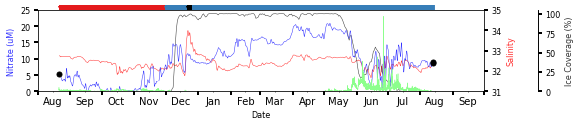

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/17ckp1a_merge_190715_f35_f35.csv


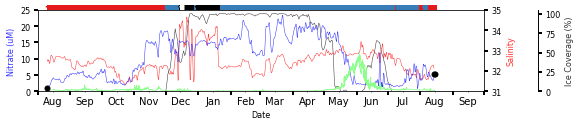

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/16ckp2a_merge_190712_f35_f35.csv


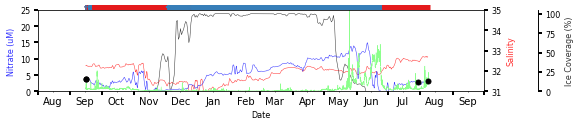

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/16ckp3a_merge_190712_f35_f35.csv


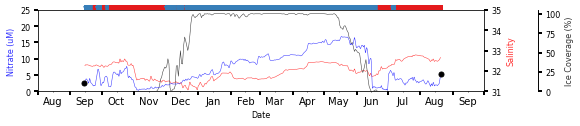

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/15ckp2a_merge_f35_f35.csv


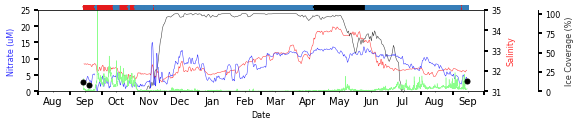

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/16ckp2a_merge_190906_f35_f35.csv


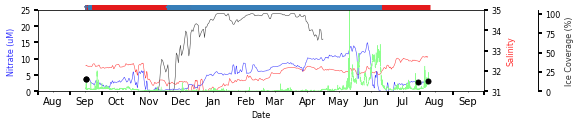

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/16ckp1a_merge_190711_f35_f35.csv


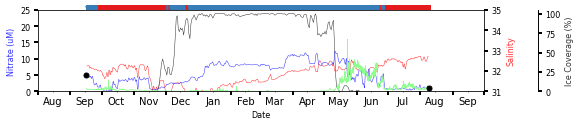

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/11ckp2a_merge_f35_f35.csv


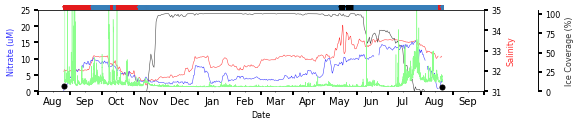

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/10ckp2a_merge_f35_f35.csv


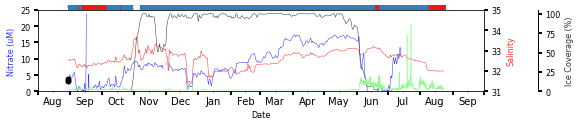

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/10ckp2a_merge_190906_f35_f35.csv


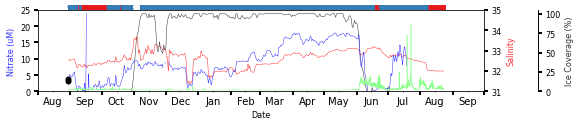

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/17ckp2a_merge_190715_f35_f35.csv


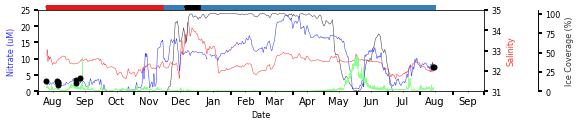

/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/14ckp2a_merge_f35_f35.csv


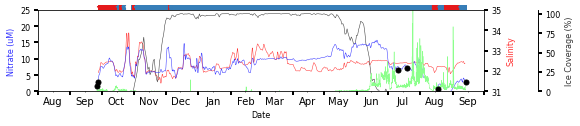

In [8]:
### modified above and cleaned

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import matplotlib.patches as patches
from datetime import datetime, date#, timedelta
import glob

##############################################################################
##############################################################################
def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
                sp.set_visible(False)
                

##############################################################################
##############################################################################
   
data_dir = '/Users/bell/in_and_outbox/2019/mordy/wisegarver/data/'

fig = plt.figure(figsize=(6,11),dpi=100)

for file in glob.glob(data_dir + '*f35_f35.csv'):  #change file path you want to work from before running
    print(f"{file}")
    csv_file = open(file,'r')
    data = pd.read_csv(csv_file,na_values='1E+35',parse_dates=True,index_col='date')

    #columns aren't all the same name... eric just defined them on position but I would like to rename them
    try:
        data['salinity'] = data['sal']
        data['salinity_f35'] = data['sal_f35']
    except:
        pass
    
    
    #Values that set the size and location of the water type bar at the top of the plot
    wtmark = 10
    wtval = 35 + (0.0124 * wtmark + 0.028)
    #wtval = 35.08
    
    #Definitions of water types are from Danielson SL, A comparison between late  
    #summer 2012 and 2013 water masses, macronutrients, and phytoplankton standing  
    #crops in the northern Bering and Chukchi Seas, 2017.
    
    #Brine Rejection / cold winter water is <-1 DegC and >33.6 PSU but isn't in paper

    #Arctic Coastal Water
    data['acw'] = np.where(((data['salinity'] >= 20) & (data['salinity'] < 32) & (data['temp'] >= 7) & (data['temp'] < 12)), wtval, np.nan)
    #Bering Chukchi Winter Water
    data['ww'] = np.where(((data['salinity'] >= 30) & (data['salinity'] <= 33.6) & (data['temp'] >= -2) & (data['temp'] < 0)), wtval,np.nan)
    #Bering Chukchi Summer Water
    data['bsw'] = np.where(((data['salinity'] >= 30) & (data['salinity'] <= 33.6) & (data['temp'] >= 0) & (data['temp'] < 7)), wtval, np.nan)
    #Melt Water
    data['mw'] = np.where(((data['salinity'] >= 25) & (data['salinity'] < 30) & (data['temp'] >= -2) & (data['temp'] < 7)), wtval, np.nan)
    #Atlantic Water
    data['aw'] = np.where(((data['salinity'] > 33.6) & (data['salinity'] < 35) & (data['temp'] >= -1) & (data['temp'] < 1)), wtval, np.nan)
    #Brine Rejection Water/Winter Water
    data['br'] = np.where(((data['salinity'] > 33.6) & (data['salinity'] < 35) & (data['temp'] >= -2) & (data['temp'] < -1)), wtval, np.nan)

    mName = file.split('/')[-1].split('_')[0]

    iyear = data.index.year[0]

    fig, ax1 = plt.subplots(figsize=(8,1.5))
    #ax1 = plt.subplots()
    #ax1.figsize=(80,120)
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    ax3.spines['right'].set_position(('axes',1.12))
    make_patch_spines_invisible(ax3)
    ax3.spines['right'].set_visible(True)

    
    a1, =ax1.plot(data.index,data.no3_f35,color=lighten_color('b',.8),linestyle='-',linewidth=.5)
    a2, =ax1.plot(data.index,data.fluor,color=lighten_color('g',.3),linestyle='-',linewidth=.5)
    a3, =ax2.plot(data.index,data.salinity_f35,color=lighten_color('r',.8),linestyle='-',linewidth=.5)
    try:
        a4, =ax3.plot(data.index[~np.isnan(data.icecov)],data.icecov[~np.isnan(data.icecov)],color=lighten_color('k',.8),linestyle='-',linewidth=.5)
    except:
        a4, =ax3.plot(data.index[~np.isnan(data.ice)],data.ice[~np.isnan(data.ice)],color=lighten_color('k',.8),linestyle='-',linewidth=.5)
        
    wm_color = 'b'
    wm_color_hex = ['#e41a1c','#377eb8','#ffffff','#984ea3','#ff7f00','#000000']
    wtkw = dict(markersize = 1, markeredgewidth=5,marker='_',clip_on=False)
    wt, =ax2.plot(data.index,data.bsw,color=wm_color_hex[0],**wtkw)
    wt, =ax2.plot(data.index,data.ww,color=wm_color_hex[1],**wtkw)
    wt, =ax2.plot(data.index,data.acw,color=wm_color_hex[4],**wtkw)
    wt, =ax2.plot(data.index,data.mw,color=wm_color_hex[3],**wtkw)
    wt, =ax2.plot(data.index,data.br,color=wm_color_hex[5],**wtkw)
    wt, =ax2.plot(data.index,data.aw,color=wm_color_hex[2],**wtkw)
    dn, =ax1.plot(data.index,data.calno3,'k.',markersize=10)
    
    #Set axis ranges and tick intervals
    ax1.set_xlim([date(iyear,8,1),date((iyear+1),10,1)])
    ax1.xaxis.set_major_formatter(mdates.DateFormatter(''))
    ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_minor_locator(mdates.DayLocator(15))
    
    ax1.yaxis.set_ticks(np.arange(0,30,5))
    ax2.yaxis.set_ticks(np.arange(31,36,1))
    ax3.yaxis.set_ticks(np.arange(0,200,25))
    
    ax1.set_ylim(0,25)
    ax2.set_ylim(31,35)
    ax3.set_ylim(0,105)
    
    lfmt = dict(fontsize=8)
    ax1.set_xlabel('Date',**lfmt)
    ax1.set_ylabel('Nitrate (uM)',**lfmt)
    ax2.set_ylabel('Salinity',**lfmt)
    ax3.set_ylabel('Ice Coverage (%)',**lfmt)
    
    ax1.yaxis.label.set_color(a1.get_color())
    ax2.yaxis.label.set_color(a3.get_color())
    ax3.yaxis.label.set_color(a4.get_color())
    
    tkw = dict(size=4, width=2, labelsize=8,colors='k')
    ax1.tick_params(axis='x', **tkw)
    ax1.tick_params(axis='x', which='minor',length=1)
    ax1.tick_params(axis='y', **tkw)
    ax2.tick_params(axis='y', **tkw)
    ax3.tick_params(axis='y', **tkw)

    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False)
    ax3.axes.get_yaxis().set_visible(True)
    
    
    plt.plot() 
    csv_file.close()
    
    plt.subplots_adjust(hspace=0.4)
    plt.savefig('plots/' + mName + '_timeseries_fno3_fsal_chlor.png',bbox_inches='tight',dpi=300,format='png')
    plt.savefig('plots/' + mName + '_timeseries_fno3_fsal_chlor.eps',format='eps',dpi=1000,bbox_inches='tight')
    plt.show()  

### Legend based on color map

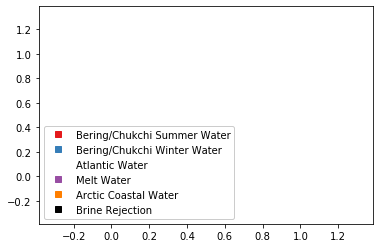

In [8]:
import numpy as np
import matplotlib.pyplot as plt

colors = ["Bering/Chukchi Summer Water", "Bering/Chukchi Winter Water", 
          "Atlantic Water", "Melt Water","Arctic Coastal Water", "Brine Rejection"]
handles = wm_color_hex

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", handles[i]) for i in range(6)]
labels = colors
legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=True)

def export_legend(legend, filename="legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

In [ ]:
data.columns